# Data Analysis for MISK | مسك with STC

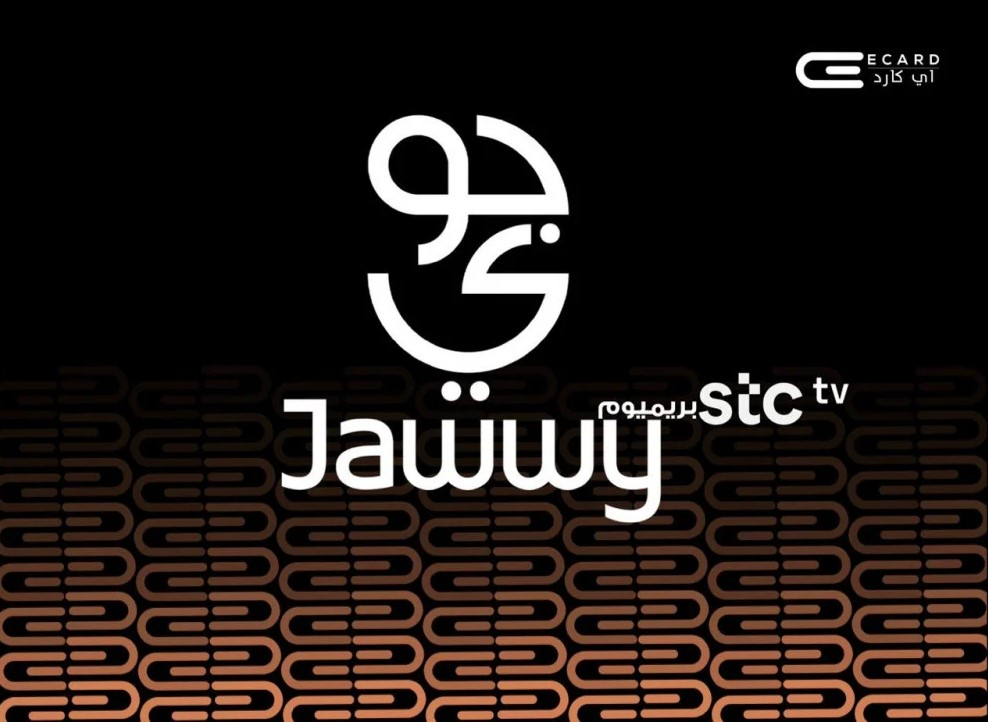

# First Mission

### STC Jawwy

In [ ]:
# !pip install pyxlsb

In [1]:
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

### Jawwy dataset
The dataset consists of meta details about the movies and tv shows as genre. 
Also details about Users activities, spent duration and if watching in High definition or standard definition. 
You have to analyse this dataset to find top insights, findings and to solve the four tasks assigned to you.

In [2]:
dataframe1 = pd.read_excel(r"E:\courses\Data Analysis\internship\Misk مسك\first mission\stc TV Data Set_T1.xlsb",sheet_name="Final_Dataset")
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [3]:
# check the data shape
dataframe1.shape

(1048575, 13)

In [4]:
# display the first 5 rows 
dataframe1.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [5]:
# Data Preprocessing on the input data
dataframe1 = dataframe1.drop(columns=['Column1'])         # dropping the index column
dataframe1['program_name'] = dataframe1['program_name'].str.strip()  # trim spaces in movies names to avoid misspellings in input data
dataframe1['date_'] = pd.to_datetime(dataframe1['date_'], unit='D', origin='30/12/1899')  # read date column as date data type
dataframe1[['duration_seconds', 'season','episode','series_title','hd']] = dataframe1[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  # read numeric columns as numeric data types
dataframe1[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = dataframe1[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) # read string columns as string data types

In [6]:
# display the dataset after applying data types
dataframe1.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [7]:
# describe the numeric values in the dataset
dataframe1.describe()

,date_,duration_seconds,season,episode,series_title,hd
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2017-10-04 00:23:20.346183936,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
min,2017-03-14 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017-06-10 00:00:00,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2017-10-14 00:00:00,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2018-01-21 00:00:00,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,2018-04-30 00:00:00,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00
std,NaN,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01


In [57]:
# check if any column has null value in the dataset
print(dataframe1.isna().sum())
print(dataframe1.isnull().any())

date_               0
user_id_maped       0
program_name        0
duration_seconds    0
program_class       0
season              0
episode             0
program_desc        0
program_genre       0
series_title        0
hd                  0
original_name       0
dtype: int64
date_               False
user_id_maped       False
program_name        False
duration_seconds    False
program_class       False
season              False
episode             False
program_desc        False
program_genre       False
series_title        False
hd                  False
original_name       False
dtype: bool


# Task 1
##### You are required to work on task one to study and HD flag for available dataset

In [63]:
# make a copy of the dataframe for working on task 1
df=dataframe1.copy()

In [64]:
# Here we try to get the most watched movies (Total Views / Total Users Views / Total watch time)
# For series we concatenated the Session episode to differentiate between episodes 
grouped=df.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in hours']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in hours', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [74]:
TotalHours = grouped.groupby("program_class")["Total watch time in hours"].sum()
display(TotalHours)

program_class
MOVIE              103444.145556
SERIES/EPISODES    255097.787500
Name: Total watch time in hours, dtype: float64

In [88]:
# TotalHours.plot(kind="bar")
# plt.show()

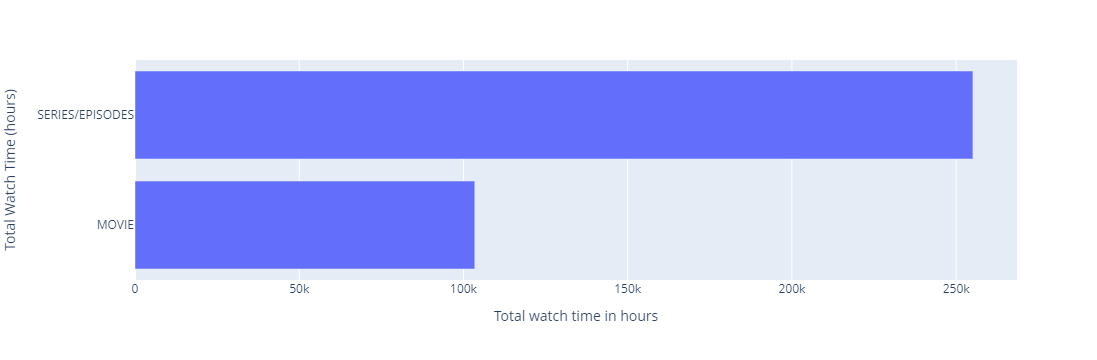

In [87]:
fig = px.bar(TotalHours, x="Total watch time in hours")
fig.update_layout(xaxis=dict(),
                  yaxis=dict(title='Total Watch Time (hours)'),
                  bargap=0.2)
fig.show()

In [11]:
# show the result
grouped.head(35)

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,3389,24047,2961.350833
1,The Amazing pider-Man,MOVIE,1011,2877,1966.119167
2,The Expendables,MOVIE,853,2119,1961.159444
3,Moana,MOVIE,2173,8081,1706.176944
4,Trolls,MOVIE,2613,13793,1601.023056
5,Bean,MOVIE,949,3617,1423.955000
6,The murfs,MOVIE,867,3132,1342.141111
7,Hotel Transylvania,MOVIE,491,1947,1096.533611
8,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
9,The Man With The Iron Fists,MOVIE,707,2505,859.626389


In [12]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

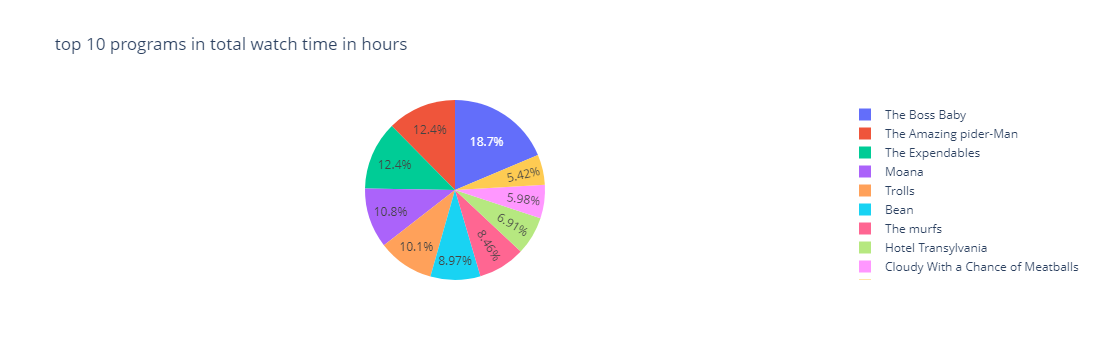

In [72]:
# plot top 10 Programs 
fig = px.pie(grouped.head(10), values='Total watch time in hours', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in hours')
fig.show()

In [89]:
# Here we try to study the customer experience against Program class
grouped=df.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in hours']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in hours', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [90]:
# show the result
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in hours
0,SERIES/EPISODES,3901,560174,255097.787500
1,MOVIE,11355,488401,103444.145556


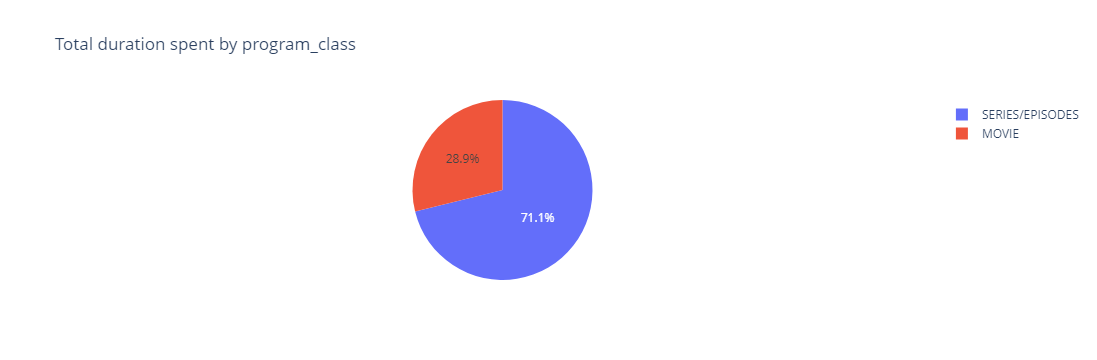

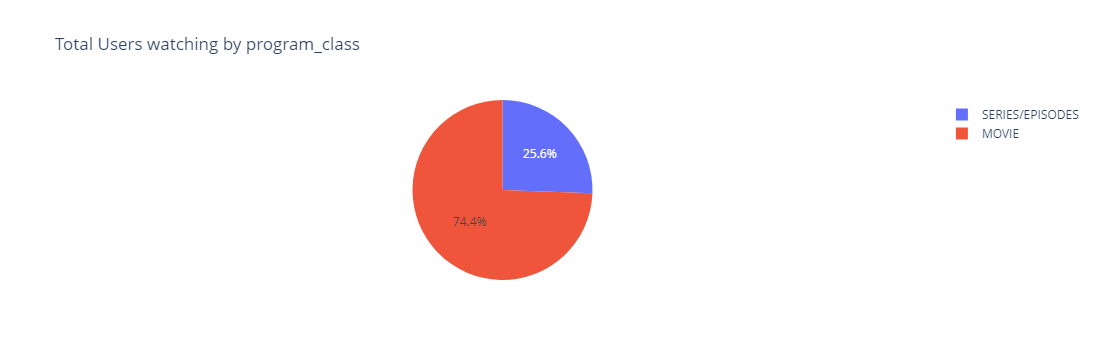

In [91]:
# plot the total watch time against total number of users and report your findings
fig = px.pie(grouped, values='Total watch time in hours', names='program_class',\
             hover_data=['program_class'],title='Total duration spent by program_class')
fig2 = px.pie(grouped, values='No of Users who Watched', names='program_class',\
             hover_data=['program_class'],title='Total Users watching by program_class')

fig.update_traces(sort=False)
fig2.update_traces(sort=False)
fig.show()
fig2.show()

In [92]:
"""
TO DO study the relation and user's behaviour Against HD flag, feel free to include any comparison 
"""


"\nTO DO study the relation and user's behaviour Against HD flag, feel free to include any comparison \n"

In [93]:
# study the relation and user's behaviour Against HD flag, feel free to include any comparison 
grouped=df.copy()
grouped = grouped.groupby(['hd','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['hd','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in hours']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in hours', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [94]:
# show the result
grouped.head()

,hd,program_class,No of Users who Watched,No of watches,Total watch time in hours
0,0,SERIES/EPISODES,3282,486884,229776.593333
1,1,MOVIE,10880,331746,64856.366111
2,0,MOVIE,6093,156655,38587.779444
3,1,SERIES/EPISODES,2625,73290,25321.194167


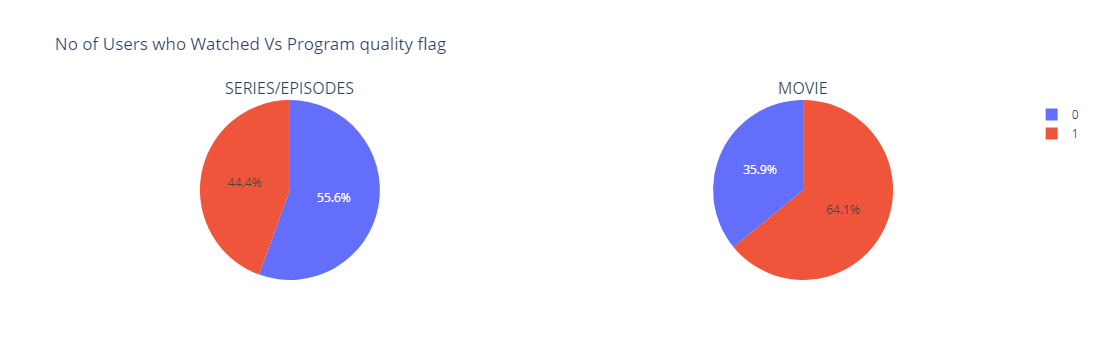

In [95]:
# plot the results 
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['SERIES/EPISODES', 'MOVIE'])
fig.add_trace(go.Pie(labels=grouped[grouped['program_class'] == 'SERIES/EPISODES']['hd'],\
                     values=grouped[grouped['program_class'] == 'SERIES/EPISODES']['No of Users who Watched'], name='SERIES/EPISODES',direction='clockwise',sort=True),row=1, col=1)
# add the 2nd graph
fig.add_trace(go.Pie(labels=grouped[grouped['program_class'] == 'MOVIE']['hd'],\
                     values=grouped[grouped['program_class'] == 'MOVIE']['No of Users who Watched'], name='MOVIE',direction='clockwise',sort=True), row=1, col=2)
fig.update_layout(title_text='No of Users who Watched Vs Program quality flag')
fig.show()


# -----------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------

# Second Mission

### STC Jawwy

In [21]:
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

### Jawwy dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [22]:
dataframe2 = pd.read_excel(r"E:\courses\Data Analysis\internship\Misk مسك\second mission\stc TV Data Set_T2 .xlsx", index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()


In [23]:
# check the data shape
dataframe2.shape

(86, 2)

In [24]:
# display the first 5 rows 
dataframe2.head()

,date_,Total_watch_time_in_houres
0,2018-01-01,1123.551944
1,2018-01-02,1000.129722
2,2018-01-03,881.924444
3,2018-01-04,782.669444
4,2018-01-05,1051.939444


In [25]:
# describe the numeric values in the dataset
dataframe2.describe()

,date_,Total_watch_time_in_houres
count,86,86.000000
mean,2018-02-28 17:01:23.720930304,780.817926
min,2018-01-01 00:00:00,562.124722
25%,2018-01-30 06:00:00,707.709653
50%,2018-02-28 12:00:00,763.181389
75%,2018-03-29 18:00:00,840.985278
max,2018-04-30 00:00:00,1123.551944
std,NaN,122.992002


In [26]:
# check if any column has null value in the dataset
dataframe2.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [27]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [28]:
# Setting the date as index
dataframe2.set_index('date_', inplace=True)

In [29]:
# Display the dataframe after setting the date as index
dataframe2.head()

,Total_watch_time_in_houres
date_,
2018-01-01,1123.551944
2018-01-02,1000.129722
2018-01-03,881.924444
2018-01-04,782.669444
2018-01-05,1051.939444


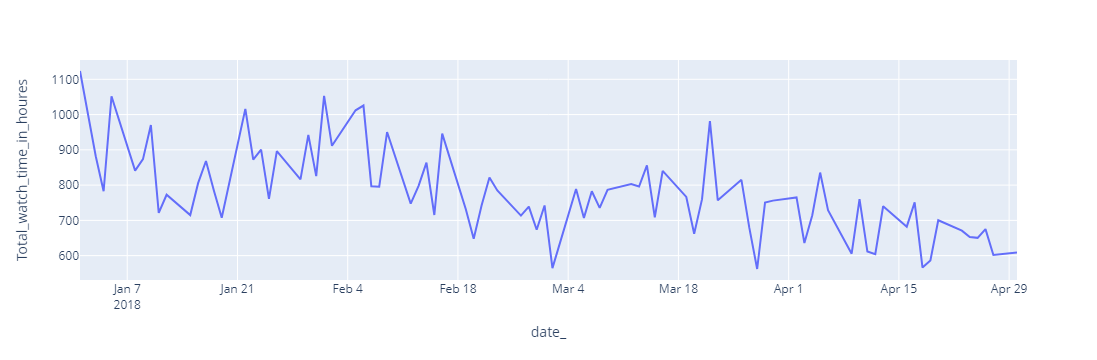

In [30]:
# show the dataframe
fig = px.line(dataframe2,  y="Total_watch_time_in_houres")
fig.show()

In [31]:
"""
TO DO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results
"""

'\nTO DO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months\nHint: you can build a forecast model to predict the results\n'

## In this part : we use a SARIMA Model to predict values for the next two months

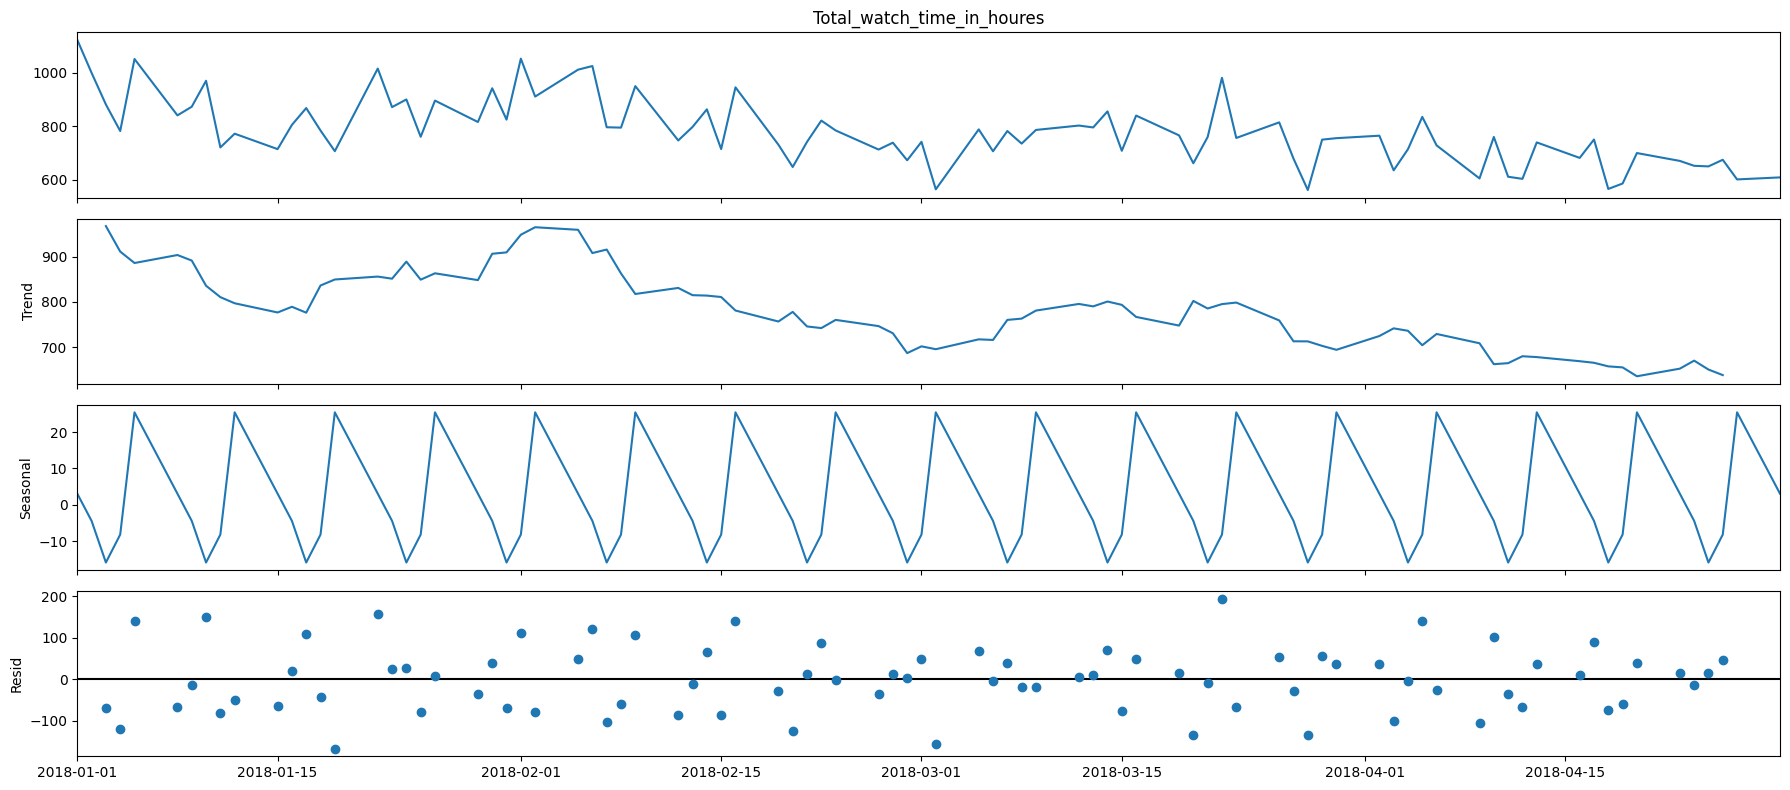

In [32]:
# using the previous dataset build a prediction model to predict the expected watch time for the next two months
y = dataframe2["Total_watch_time_in_houres"]
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

- Explanation:

1. y = dataframe["Total_watch_time_in_hours"]: Extracts the watch time column from the DataFrame.

2. import statsmodels.api as sm: Imports the statsmodels library for time series analysis.

3. from pylab import rcParams: Imports rcParams for setting plot parameters.

4. rcParams['figure.figsize'] = 18, 8: Sets the size of the plot.

5. decomposition = sm.tsa.seasonal_decompose(y, model='additive'): 
Decomposes the time series into trend, seasonal, and residual components using the additive model.

6. fig = decomposition.plot(): Plots the decomposition.

- Keep in mind that this decomposition provides insights into the trend and seasonality present in the data, which can be useful for further analysis and forecasting. Adjustments to the model or additional preprocessing may be needed depending on the characteristics of your data.

In [33]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


- import itertools: Imports the itertools module for iterable tools.
- p = d = q = range(0, 2): Defines ranges for model parameters (p, d, q).
- pdq = list(itertools.product(p, d, q)): Creates all possible combinations of (p, d, q).
- seasonal_pdq = .... : Creates seasonal combinations with a seasonal period of 12 (monthly data).
- print('Seasonal ARIMA...'): Prints information about the seasonal ARIMA model combinations.

In [34]:
print(pdq)
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [35]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=False)
            
            results = mod.fit(disp=0)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1393.7197896122402


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1322.6450083078023
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:958.3625156123426


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:942.0657659770474
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1153.5843935854018


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1138.4941538238586
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:939.2933564975328


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:940.93451007195
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1303.3183113131547


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1267.0776958049387
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:959.4316765909434


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:940.1851703961498


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1151.2466900515346


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1131.2434547881548


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:937.8802530909363


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:939.0125465397169
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1065.2447995635102
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1061.0176250210827
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:984.6246941557959


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequ

ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:944.0813040020424
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1061.8965863118203


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1062.9368701350065
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:955.5963068735754


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:942.2167670037753
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1025.4449898259572
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1023.8781401170146


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequ

ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:946.349927448036


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:909.5747650282867
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1023.9957033575946


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1025.877568483699


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:918.6416712347163


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:908.7386811737528
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1083.1712355278082


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1079.148796541444
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:958.9709573208625


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:937.5027332060749
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1079.9427175617695


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1081.089524485327


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:936.8309414445257


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:937.290799955056
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1044.0130761214102


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1042.4266864068034
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:956.4915051149608


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:924.0705965474243


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1042.5323514515653


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1048.1714308687947


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:930.6851837984424


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:923.1732799805908
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1042.1267220529853
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1041.680043081199


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequ

ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:956.4647373771501


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:924.3077234200191
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1042.3883863700235


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1042.7604482920556


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:937.8916043471779


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:925.5633302239941
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1026.919646535666


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1025.6699066277004
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:946.3835810154552


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:911.3145856366017
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1025.7966752044704


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1027.6654471308752


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:920.3449042845955


C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:910.7381314170241


- we look for the lowest value of AIC and we will know the parameters for ARIMA model.
- which is : ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:908.7386811737528
- Nested loops: Iterate through all possible combinations of SARIMA model parameters.
- Try-Except Block: Fit a SARIMA model and print the Akaike Information Criterion (AIC). Continue to the next iteration if fitting fails.

In [36]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit(disp=0)
print(results.summary().tables[1])

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Mostafa Zaglol\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7956      0.087     -9.121      0.000      -0.967      -0.625
ma.S.L12      -1.0000      0.158     -6.339      0.000      -1.309      -0.691
sigma2      1.002e+04   1.57e-05   6.36e+08      0.000       1e+04       1e+04


- The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we'll focus our attention on the table of coefficients.
- The coef column shows the weight (i.e.importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p_value lower or close to 0.05, so it is reasonable to retain all of them in our model.

- Specific Model: Manually specify a SARIMA model with selected parameters.
- results = mod.fit(disp=0): Fit the model to the time series data.
- print(results.summary().tables[1]): Display a summary table of the fitted model.

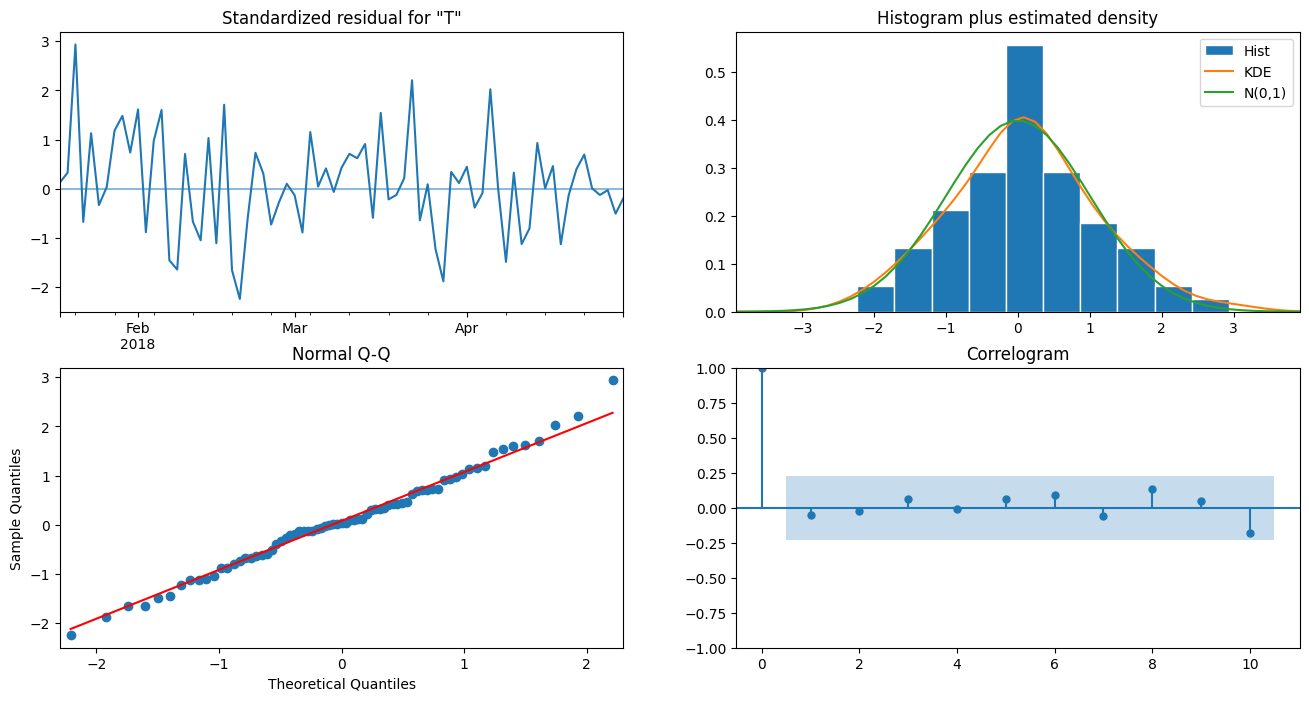

In [37]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

results.plot_diagnostics(): Generate diagnostic plots for the fitted model.

- In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with (0,1). Again, this is a strong indication that the residuals are normally distributed.
- The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e.correlogram) plot on the bottom right which shows that the time series residuals have low correlation with lagged versions of itself.

## Validate Forecast : 

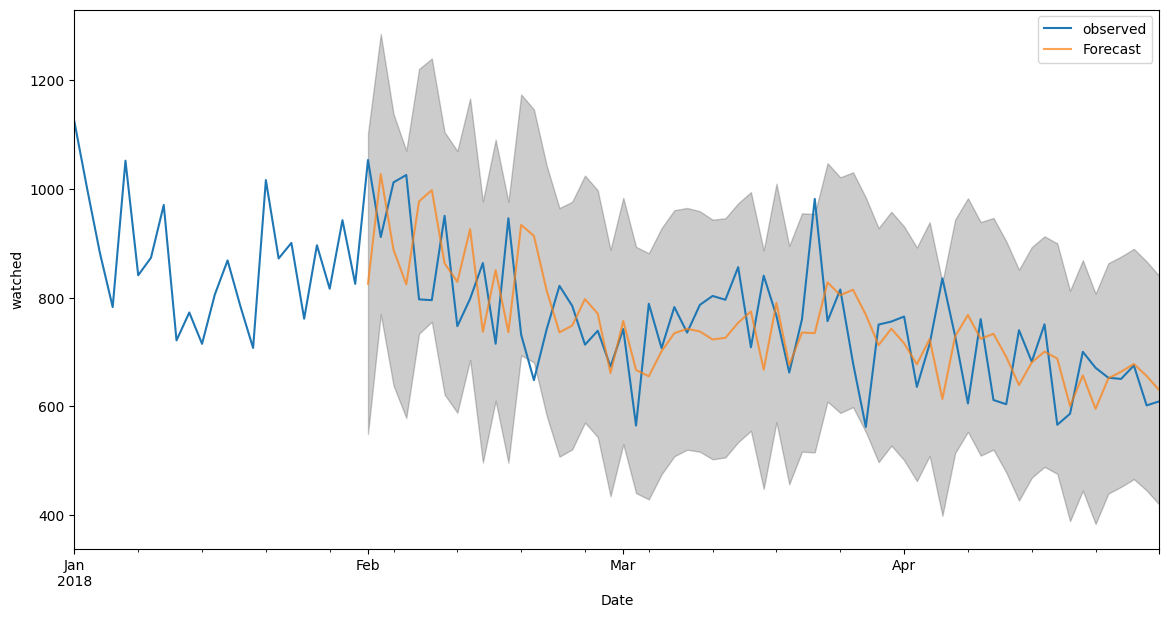

In [38]:
# show the Model out come agianst the actual data
pred = results.get_prediction(start=pd.to_datetime('2018-02-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dataframe2['Total_watch_time_in_houres'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('watched')
plt.legend()
plt.show()

- We have obtained a model for our time series that can now be used to produce forecasts. We start by comparing predicted values to real values of the time series, which will help us understand the accuuracy of our forecasts.
- The get_prediction() and conf_int() attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.
- The dynamic = False argument ensures that we produce one_step ahead forecasts, meaning that forecasts at each point are generated using the full history up to that point.

- Generates point forecasts for a specified starting date and visualizes the observed and forecasted values.
- Displays a plot with observed values, forecasted values, and prediction intervals.

## Future Predictions:

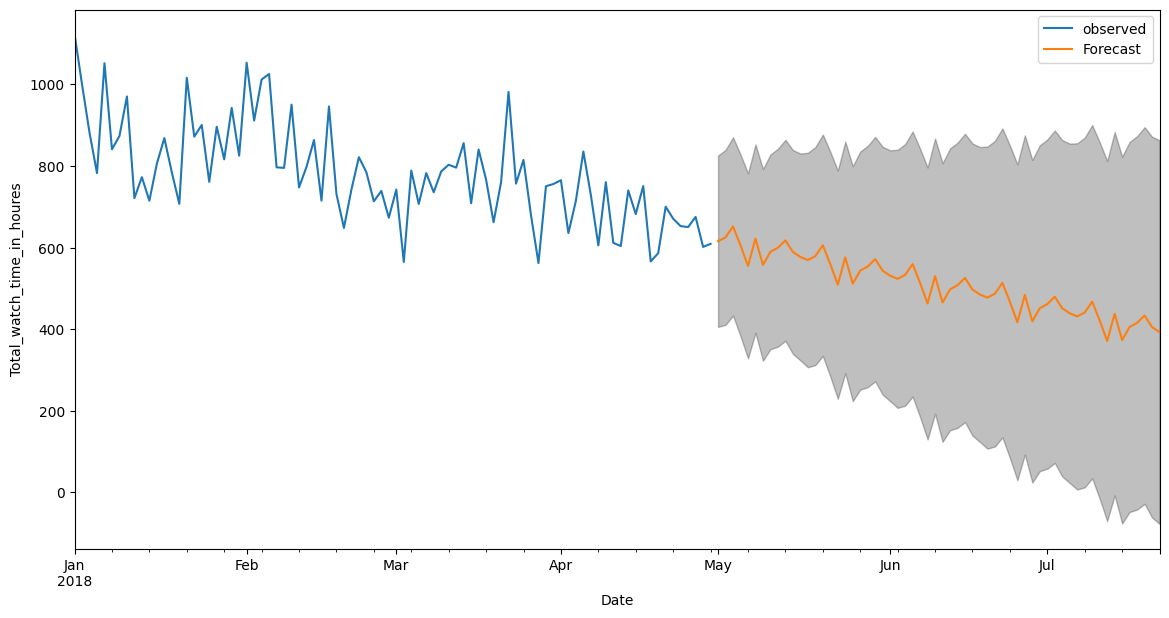

In [39]:
# show forecasts 
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total_watch_time_in_houres')
plt.legend()
plt.show()

In [40]:
pred_ci

,lower Total_watch_time_in_houres,upper Total_watch_time_in_houres
2018-05-01,405.583666,825.686114
2018-05-02,410.858904,839.625714
2018-05-03,433.187407,870.437859
2018-05-04,382.766739,828.339254
2018-05-07,328.328681,782.070651
2018-05-08,391.254609,853.021524
2018-05-09,322.744049,792.398807
2018-05-10,351.033193,828.445490
2018-05-11,357.238183,842.284096
2018-05-14,371.537135,864.094408


### Producing and Visualizing Forecasts 
- In the final step of this tutorial, we describe how to leverage our seasonal ARIMA time series model to forecast future values. The get_forecast() attribute of our time series object can compute forecasted values for a specified number of steps ahead.

- Generates forecasts for an additional 60 steps (days) and visualizes the extended forecast.
- Displays a plot with observed values and the forecast for the extended period.

#### The overall code performs time series forecasting using SARIMA, explores different parameter combinations, fits the model, evaluates diagnostics, and visualizes both short-term and extended forecasts.

# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------

# Third Mission

In [41]:
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of details about each customer and the movies and/or tv shows watched in addition to the genre. 

You are required to work on task three to build a recommendation engine for our platform to Recommend movies to usesrs that they might be interested in¶


In [42]:
dataframe3 = pd.read_excel(r"E:\courses\Data Analysis\internship\Misk مسك\Third mission\stc TV Data Set_T3.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [43]:
# check the data shape
dataframe3.shape

(1048575, 5)

In [44]:
# display the first 5 rows 
dataframe3.head(30)

,user_id_maped,program_name,rating,date_,program_genre
0,26138,100 treets,1,2017-05-27,Drama
1,7946,Moana,1,2017-05-21,Animation
2,7418,The Mermaid Princess,1,2017-08-10,Animation
3,19307,The Mermaid Princess,2,2017-07-26,Animation
4,15860,Churchill,2,2017-07-07,Biography
5,20775,Beavis And Butt-Head Do America,1,2017-08-19,Animation
6,11374,The Mermaid Princess,4,2017-06-26,Animation
7,6358,Coco,1,2018-03-29,Animation
8,11660,Kidnap,2,2018-01-27,Action
9,5155,The Accountant,1,2017-03-30,Action


In [104]:
dataframe3["program_name"].value_counts().head(60)

program_name
The Boss Baby                                             24047
Pingu                                                     17063
Trolls                                                    13793
The Adventures of Petey and Friends                        9612
Moana                                                      8081
The Mermaid Princess                                       7525
Baywatch                                                   7436
Oscar's Oasis                                              7174
Ferdinand                                                  6817
An Inconvenient equel: Truth to Power                      6342
Collateral Beauty                                          6212
Inside                                                     6134
The hape of Water                                          5427
Nan and Lili    Ep.                                        5038
Me and My iblings    Ep.                                   4581
Rings                      

In [45]:
dataframe3.tail(30)

,user_id_maped,program_name,rating,date_,program_genre
1048545,2036,Shimmer And hine Dino Might!,3,2017-10-21,Animation
1048546,2465,Brigsby Bear,1,2018-01-30,Comedy
1048547,18798,Final Fantasy VII: Advent Children,2,2017-09-22,Animation
1048548,28536,Let's Be Cops,1,2017-03-20,Comedy
1048549,10318,Bean,4,2017-11-19,Comedy
1048550,25425,Kalam A-Nas Ep12,2,2017-12-11,Comedy
1048551,29646,The Penguins of Madagascar Penguiner Takes All,3,2017-11-18,Animation
1048552,13934,The Dinner,1,2017-09-25,Drama
1048553,15658,Littlest Pet hop (T) Missing Blythe,1,2017-05-12,Animation
1048554,24277,American Odyssey Gone Elvis,2,2017-11-11,Action


In [46]:
# describe the numeric values in the dataset
dataframe3.describe()

,user_id_maped,rating,date_
count,1.048575e+06,1.048575e+06,1048575
mean,1.709266e+04,2.497283e+00,2017-10-04 00:23:20.346183936
min,1.000000e+00,1.000000e+00,2017-03-14 00:00:00
25%,8.253000e+03,1.000000e+00,2017-06-10 00:00:00
50%,1.714900e+04,2.000000e+00,2017-10-14 00:00:00
75%,2.566500e+04,3.000000e+00,2018-01-21 00:00:00
max,3.428000e+04,4.000000e+00,2018-04-30 00:00:00
std,1.003513e+04,1.119837e+00,NaN


In [47]:
# check if any column has null value in the dataset
dataframe3.isnull().any()

user_id_maped    False
program_name     False
rating           False
date_            False
program_genre    False
dtype: bool

In [48]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [49]:
print(dataframe3["program_genre"].value_counts())
print(len(dataframe3))

program_genre
Animation                           401730
Action                              174155
Drama                               155048
Comedy                              136577
Horror                               75306
Thriller                             39601
Family                               26668
Biography                            16135
Documentary                          13291
NOT_DEFINED_IN_UMS                    4535
Crime                                 3232
Sci-Fi                                1322
Romance                                512
Adventure                              239
SERIES_NOT_ADDED_UNDER_ANY_GENRE       216
Wrestling                                8
Name: count, dtype: int64
1048575


In [50]:
"""
TO DO build your Recommender system to Highlight Programs that usesrs might be interested in
"""

'\nTO DO build your Recommender system to Highlight Programs that usesrs might be interested in\n'

In [99]:
# Pair-wise table for user rating for all movies
movie_features_df=dataframe3.pivot_table(index='program_name',columns='user_id_maped',values='rating').fillna(0)
movie_features_df.head(20)

user_id_maped,1,5,9,11,15,17,20,26,28,30,...,34259,34261,34263,34265,34267,34269,34271,34273,34277,34280
program_name,,,,,,,,,,,,,,,,,,,,,
#FollowFriday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Days in a Madhouse,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 treets,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102 Dalmatians,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Monkeys Arms Of Mine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Monkeys Atari,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Monkeys Blood Washed Away,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
movie_features_df_matrix = csr_matrix(movie_features_df.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [54]:
movie_features_df_selection= movie_features_df.reset_index()
movie_features_df_selection[['program_name']]
dataframe3[['program_name']].head(10)

,program_name
0,100 treets
1,Moana
2,The Mermaid Princess
3,The Mermaid Princess
4,Churchill
5,Beavis And Butt-Head Do America
6,The Mermaid Princess
7,Coco
8,Kidnap
9,The Accountant


In [55]:
"""
TO DO show the recommendations (top 5) for the people who watched "Moana" movie
"""

'\nTO DO show the recommendations (top 5) for the people who watched "Moana" movie\n'

In [56]:
# show the recommendations (top 5)
program_name='Moana'
recomendations=5

query_index = np.random.choice(movie_features_df.shape[0])
distances, indices = model_knn.kneighbors(movie_features_df.
                     iloc[movie_features_df_selection.index[movie_features_df_selection['program_name'] == program_name].tolist()[0],:].values.reshape(1, -1),
n_neighbors = recomendations+1)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[movie_features_df_selection.index[movie_features_df_selection['program_name'] == program_name].tolist()[0]]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Moana:

1: Trolls, with distance of 0.42764217010640215:
2: Surf's Up : WaveMania, with distance of 0.4705763355181768:
3: The Mermaid Princess, with distance of 0.5066377099343184:
4: The Boss Baby, with distance of 0.551442834662541:
5: The Jetsons & WWE: Robo-WrestleMania!, with distance of 0.5610577907608365:
